# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# You can adjust parameters:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

# for training:  my_RandomForest.fit 
# for testing/prediction:  my_RandomForest.predict

# Model Evaluation and Visualization 


###    More on LOGISTIC REGRESSION:
#### Importing the sklearn class (machine learning algorithm) that you would like to use for modeling:

In [44]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Set up the Feature Matrix and Label Vector:

In [45]:
# reading a CSV file directly from Web (or local drive), and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local drive:

Heart_df = pd.read_csv('Heart_short.csv')
#cancer_df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS4661/master/cancer.csv')

# checking the dataset by printing every 10 lines:
Heart_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


In [46]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Age','RestBP',
                'Chol','RestECG','MaxHR',
                'Oldpeak']

# use the above list to select the features from the original DataFrame
X = Heart_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = Heart_df['AHD']

# print the first 5 rows
print(X.head())
print(y.head())

   Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0   63     145   233        2    150      2.3
1   67     160   286        2    108      1.5
2   67     120   229        2    129      2.6
3   37     130   250        0    187      3.5
4   41     130   204        2    172      1.4
0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object


#### Splitting the Dataset:

In [47]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(224, 6)
(224,)
(57, 6)
(57,)


#### Defining (instantiating) an "object" from the sklearn class:

In [48]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()


#### Training Stage: Training a predictive model using the training dataset:


In [49]:
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [50]:
# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

['No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No']


### Accuracy Evaluation:


In [51]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)


0.7719298245614035


## Estimating the Probability (likelihood) of happening an Event: 
##### As we mentioned before, Logistic Regression can also estimate the probability of happening the event (estimating the likelihood of each label) rather than just providing a binary prediction (see Logistic Regression lecture for more information).
##### Thus, we can adjust the True Positive Rate (TPR = Sensitivity) and False Positive Rate (FPR = False Alarm Rate) by changing the decision Threshold (see Model Evaluation lecture for more information).

In [52]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)


In [53]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

157     No
7       No
99     Yes
13      No
112     No
89     Yes
93      No
66      No
227     No
176     No
173    Yes
252    Yes
29     Yes
77      No
127     No
3       No
245    Yes
35      No
191    Yes
142     No
133    Yes
141     No
250    Yes
101    Yes
118     No
11      No
113     No
152    Yes
128     No
155    Yes
65      No
30      No
53      No
217     No
153    Yes
231     No
74     Yes
84     Yes
10      No
266     No
175     No
181     No
98     Yes
131    Yes
212     No
23     Yes
120     No
251     No
215    Yes
85     Yes
115    Yes
270    Yes
134    Yes
243    Yes
274    Yes
54      No
4       No
Name: AHD, dtype: object
['No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No']
[[0.84064996 0.15935004]
 [0.72573548

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [54]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.01754386 1.        ]
[nan nan nan]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


# AUC:

In [55]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

nan


# ROC Curve:

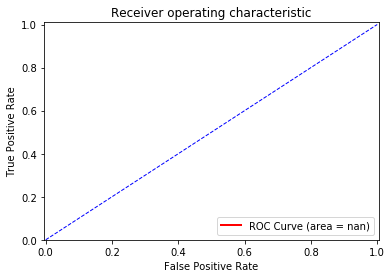

In [56]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Repeating the process with smaller number of features:

In [57]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols2 = ['RestBP','Chol']

# use the above list to select the features from the original DataFrame
X2 = Heart_df[feature_cols2] 

# select a Series of labels (the last column) from the DataFrame
y2 = Heart_df['AHD']

#Splitting the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=2)

my_logreg2 = LogisticRegression()
my_logreg2.fit(X_train2,y_train2)

# Predicting the Binary Label:
y_predict_lr2 = my_logreg2.predict(X_test2)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr2 = my_logreg2.predict_proba(X_test2)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_predict_prob_lr2[:,1], pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

nan


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


### Comparing the ROC Curves:

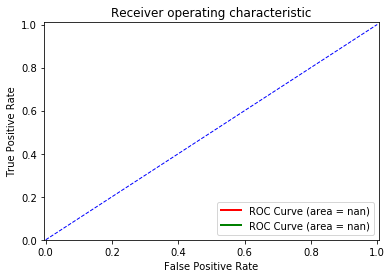

In [58]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# More on Visualization: Plotting KMeans Clustering Results

<function matplotlib.pyplot.show>

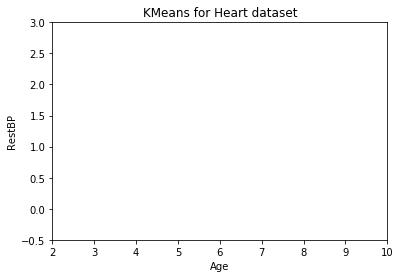

In [59]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

# KMeans Clustering for iris dataset:
Heart_df = pd.read_csv('Heart_short.csv')

#feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
feature_cols = ['Age','RestBP']
X = Heart_df[feature_cols]

# Clustering:
my_KMeans = KMeans(n_clusters=3)
my_KMeans.fit(X)

# Assigned Labels after clustering: 
labels = my_KMeans.labels_

# Centers of the clusters:
centers = my_KMeans.cluster_centers_

# Plotting the results:
plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([2, 10])
plt.ylim([-0.5, 3])

# Labels, Title, Legend:
plt.xlabel('Age')
plt.ylabel('RestBP')
plt.title('KMeans for Heart dataset')

plt.show